<a href="https://colab.research.google.com/github/RubenCeV/Int-Artificial/blob/main/Actividad_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad 7: Redes Neuronales Artificiales**



1.  Rubén Alfredo Cepeda Villegas #2049124
2.  Andrés Gael Lopez Chairez #2023903
3.  Angel Antonio Izaguirre Aguirre #2058212
4.  Miguel Angel Quiñones Rosales # 2173921
5.  Tadeo Isai Sebastian Vargas # 2063804

Hora: N5

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
# Cargar el conjunto de datos MNIST desde Keras
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

print("set de entrenamiento", train_data.shape)
print("set de prueba", test_data.shape)

set de entrenamiento (60000, 28, 28)
set de prueba (10000, 28, 28)


In [ ]:
# Escalar los valores de 0-255 a 0-1
train_data = train_data / 255.0
test_data = test_data / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # Convierte 28x28 → vector de 784
    keras.layers.Dense(128, activation='relu'),   # Capa oculta 1
    keras.layers.Dense(64, activation='relu'),    # Capa oculta 2
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con softmax
])




In [ ]:
# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar
model.compile(
    optimizer='adam',  # o tf.keras.optimizers.Adam(learning_rate=0.001)
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Entrena
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.1, verbose=2)

# Evalua
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f"\nExactitud en test: {test_accuracy:.4f}")


Epoch 1/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9263 - loss: 0.2518 - val_accuracy: 0.9680 - val_loss: 0.1052
Epoch 2/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9666 - loss: 0.1101 - val_accuracy: 0.9740 - val_loss: 0.0933
Epoch 3/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9772 - loss: 0.0749 - val_accuracy: 0.9697 - val_loss: 0.1022
Epoch 4/10
1688/1688 - 9s - 5ms/step - accuracy: 0.9817 - loss: 0.0568 - val_accuracy: 0.9782 - val_loss: 0.0786
Epoch 5/10
1688/1688 - 9s - 5ms/step - accuracy: 0.9858 - loss: 0.0446 - val_accuracy: 0.9797 - val_loss: 0.0775
Epoch 6/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9885 - loss: 0.0349 - val_accuracy: 0.9775 - val_loss: 0.0910
Epoch 7/10
1688/1688 - 9s - 6ms/step - accuracy: 0.9901 - loss: 0.0296 - val_accuracy: 0.9795 - val_loss: 0.0797
Epoch 8/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9916 - loss: 0.0248 - val_accuracy: 0.9810 - val_loss: 0.0831
Epoch 9/10
1688/1688 - 11s - 6ms/step - accuracy: 0.9926 - loss: 0.0215 - val_accuracy: 0.975

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


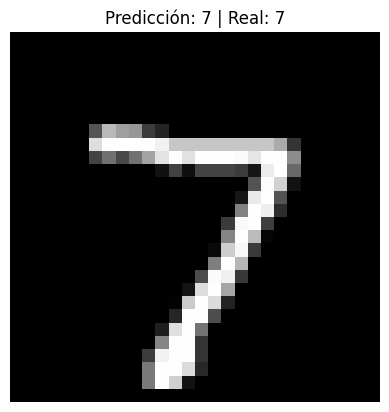

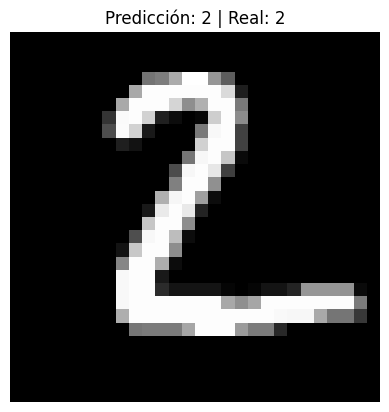

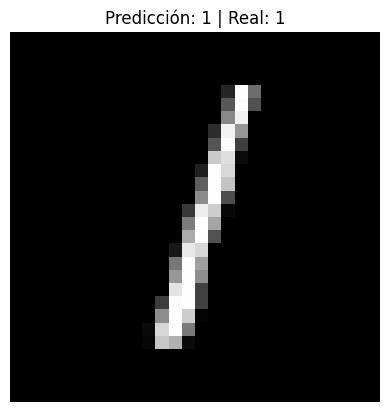

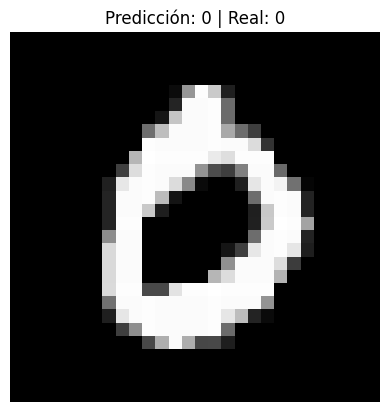

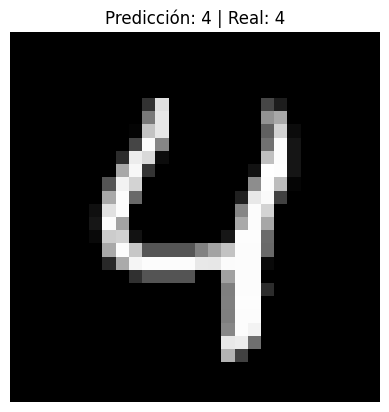

In [ ]:
# Predicciones
predictions = model.predict(test_data)
for i in range(5):
    plt.imshow(test_data[i], cmap='gray')
    plt.title(f"Predicción: {tf.argmax(predictions[i]).numpy()} | Real: {test_labels[i]}")
    plt.axis('off')
    plt.show()